In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms import *
from benchmark import *

test_functions =[StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky]

### Bayesian optimization sampling comparison

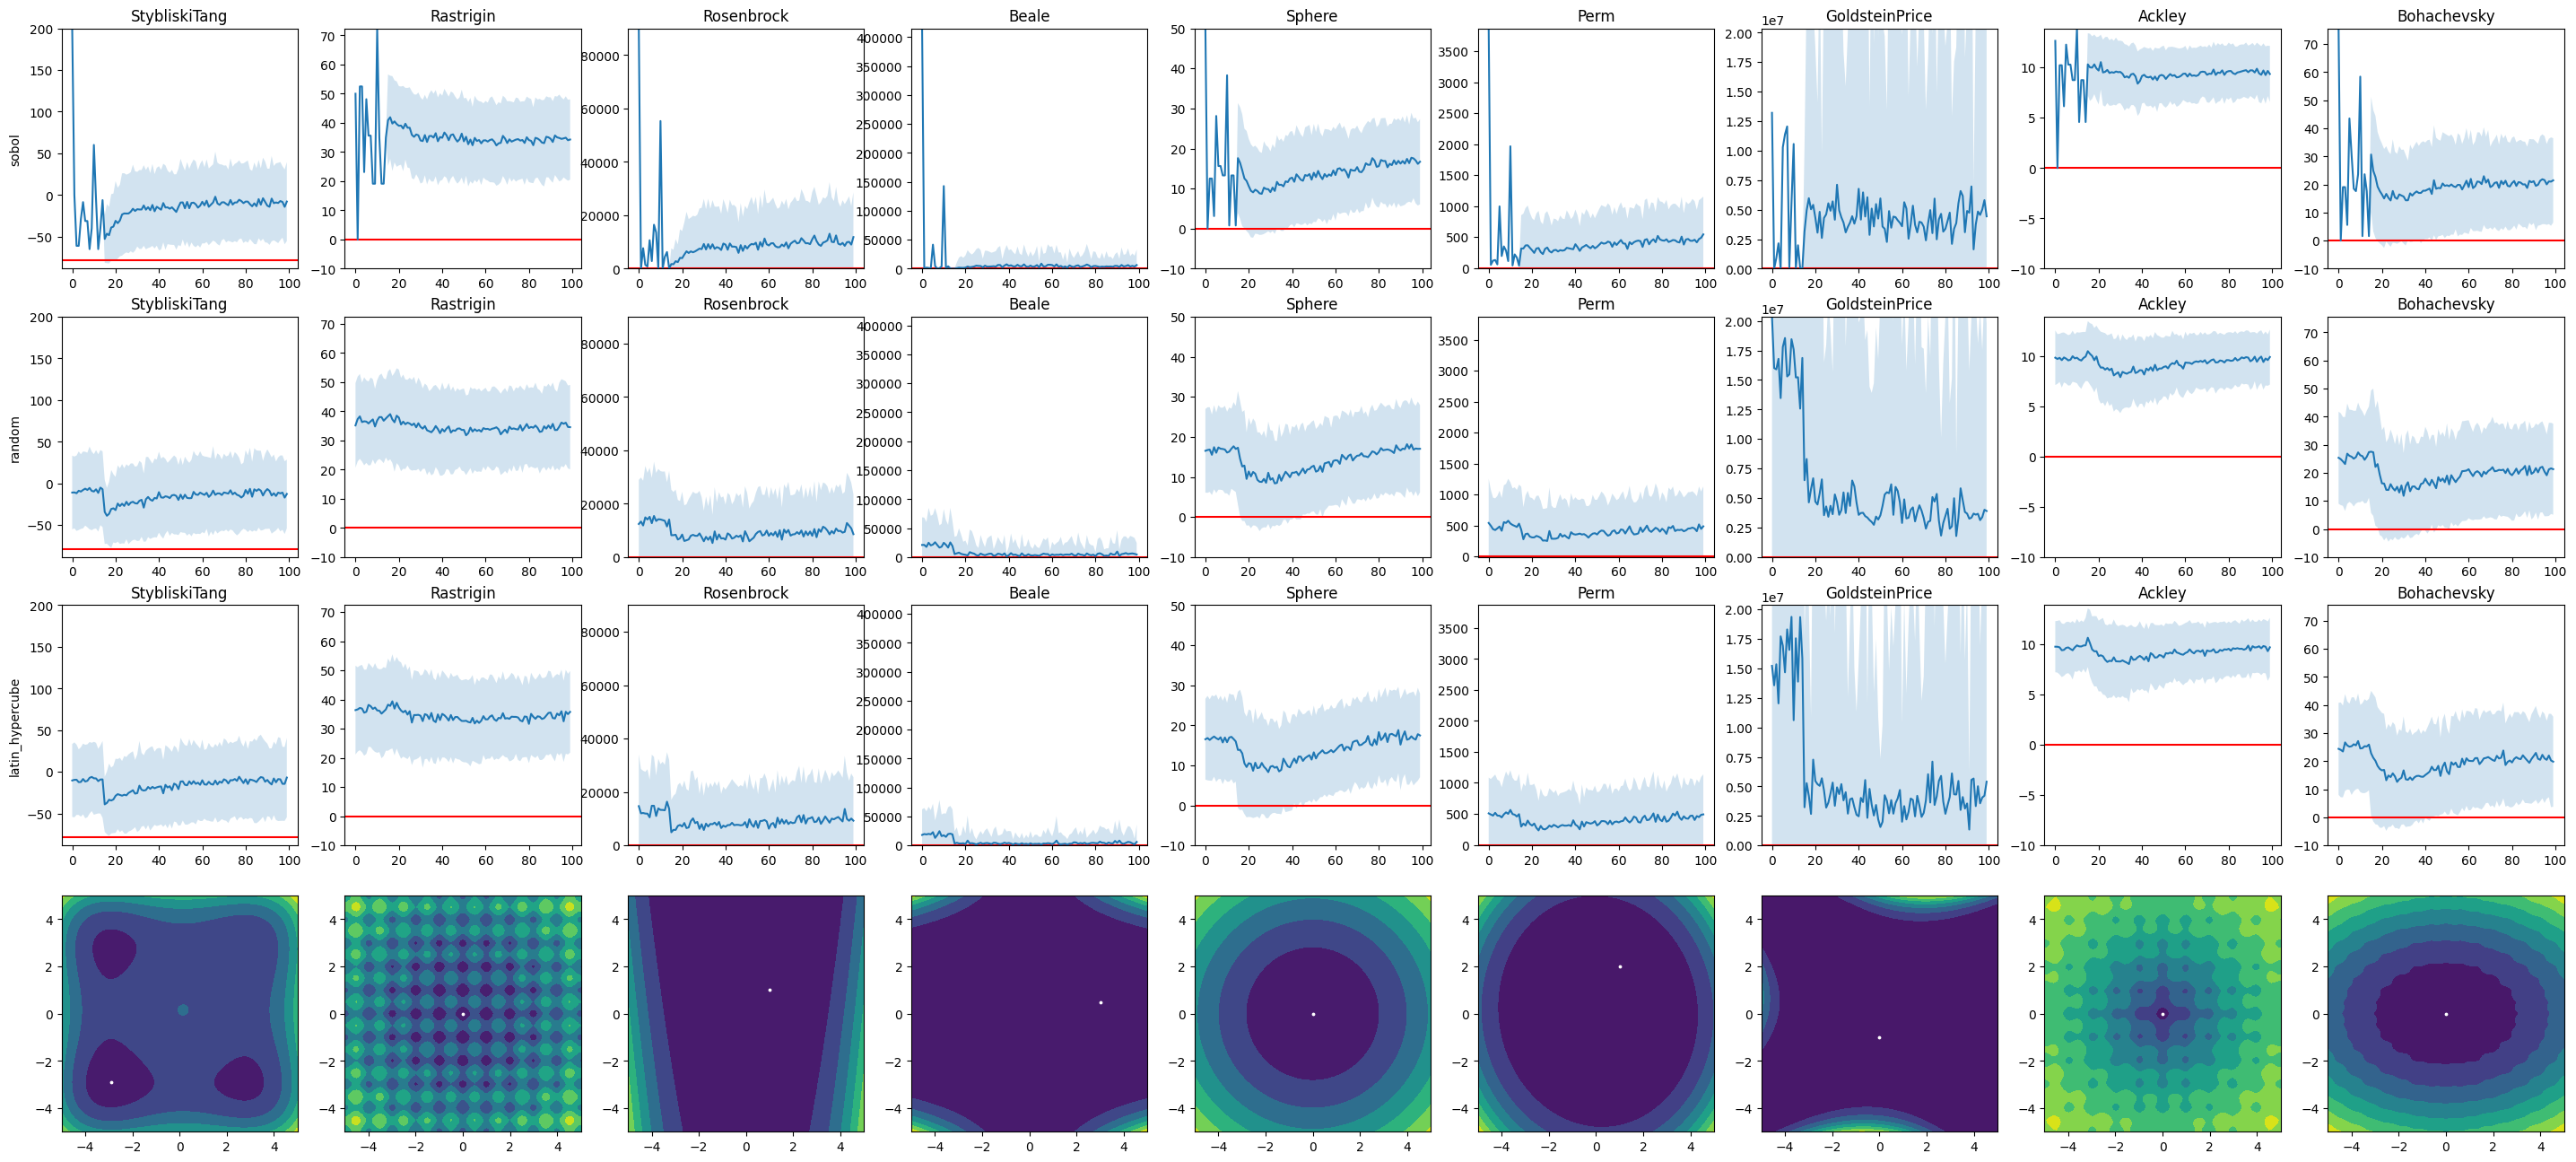

In [10]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(4, len(test_functions), figsize=(4*len(test_functions),16))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[3,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[3,idx].axis('scaled')  
    
    Ylims = [np.min(Fx) - 10, np.min(Fx) + 10]
    for ii,samp_mode in enumerate(["sobol","random","latin_hypercube"]):
        Y_log = []
        for test in range(tests):
            Xmin, Ymin, X, Y = bayesian_optimization(fcn, n_samples=15, sampling_budget=budget, sampling_method=samp_mode, dimension=2, boundaries=[[-5, -5],[5,5]])
            Y_log.append(Y)
        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)
        
        if (np.min(Ymean) < Ylims[0]): Ylims[0] = np.min(Ymean)
        if (np.max(Ymean) > Ylims[1]): Ylims[1] = np.max(Ymean)
        # Plot the performances
        ax[ii,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

        ax[ii,idx].plot(range(len(Ymean)), Ymean)
        ax[ii,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

        ax[ii,idx].set_title(fcn.__name__)
        if (idx == 0): ax[ii,idx].set_ylabel(samp_mode)

    for jj in range(0,3): ax[jj,idx].set_ylim(ymin=Ylims[0], ymax=Ylims[1])

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[3,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)
  
plt.show()

### Particle Swarm Optimization

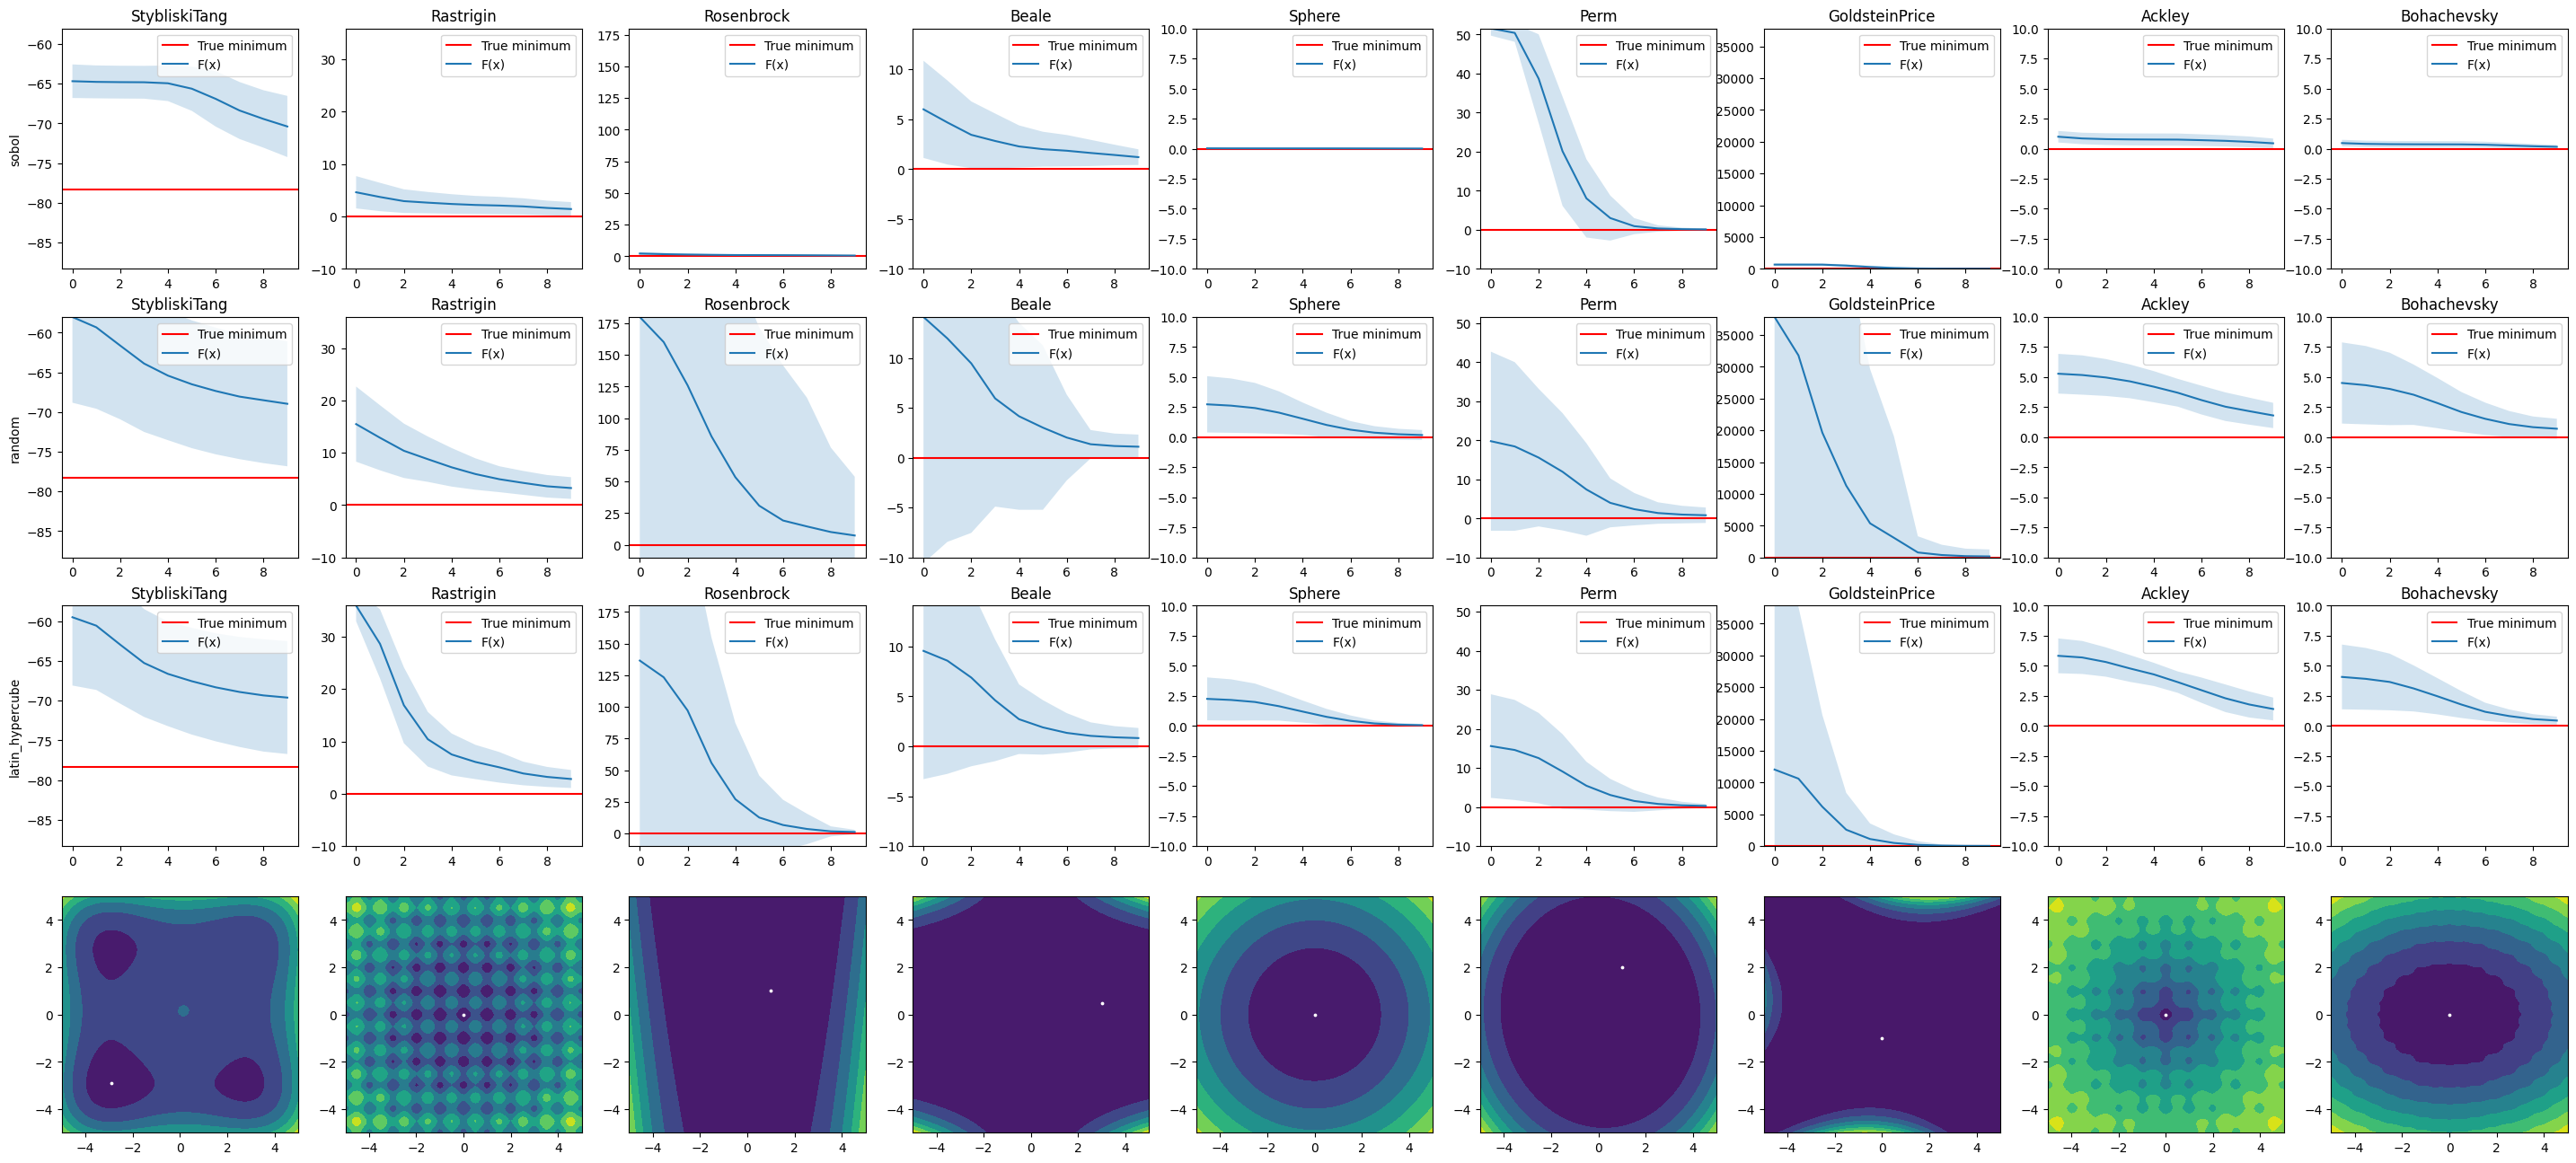

In [5]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(4, len(test_functions), figsize=(4*len(test_functions),16))

for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[3,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[3,idx].axis('scaled')  

    Ylims = [np.min(Fx) - 10, np.min(Fx) + 10]
    for ii,samp_mode in enumerate(["sobol","random","latin_hypercube"]):
        Y_log = []
        for test in range(tests):
            Xmin, Ymin, X, Y = particle_swarm(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, 
                                              sampling_method=samp_mode, n_particles=10, tollerance=10e-6, c1=0.1, c2=0.1, w=0.8)
            Y_log.append(Y)


        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)

        if (np.min(Ymean) < Ylims[0]): Ylims[0] = np.min(Ymean)
        if (np.max(Ymean) > Ylims[1]): Ylims[1] = np.max(Ymean)
        
        # Plot the performances
        ax[ii,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

        ax[ii,idx].plot(range(len(Ymean)), Ymean)
        ax[ii,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation')

        ax[ii,idx].set_title(fcn.__name__)
        ax[ii,idx].legend(["True minimum","F(x)"])
        if (idx == 0): ax[ii,idx].set_ylabel(samp_mode)
    for jj in range(0,3): ax[jj,idx].set_ylim(ymin=Ylims[0], ymax=Ylims[1])

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    ax[3,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)
  
plt.show()

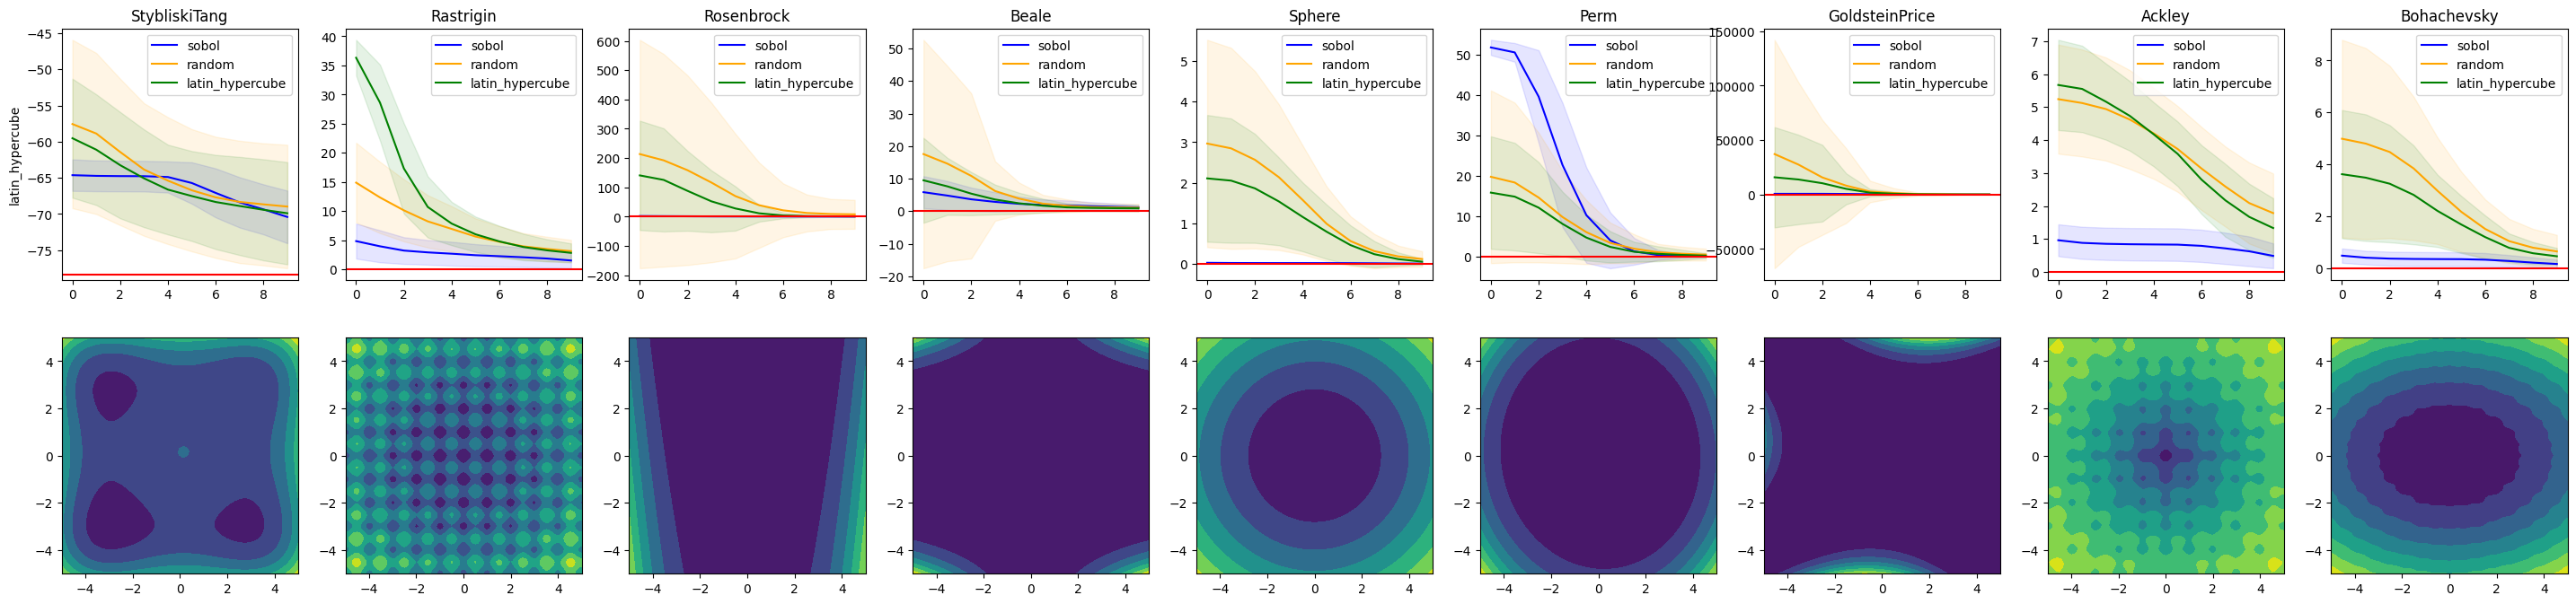

In [26]:
budget = 100
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

fig, ax = plt.subplots(2, len(test_functions), figsize=(4*len(test_functions),8))
colors = ["blue","orange","green"]
for idx, fcn in enumerate(test_functions):

    Fx = fcn(points.T)

    # Draw the test function
    ax[1,idx].contourf(X1,X2,Fx.reshape(101,101).T)
    ax[1,idx].axis('scaled')  

    Ylims = [np.min(Fx) - 10, np.min(Fx) + 10]
    lines = []
    for ii,samp_mode in enumerate(["sobol","random","latin_hypercube"]):
        Y_log = []
        for test in range(tests):
            Xmin, Ymin, X, Y = particle_swarm(fcn, dimension=2, boundaries=[[-5,-5],[5,5]], vel_boundaries=[[0,0],[0.1,0.1]], sampling_budget=budget, 
                                              sampling_method=samp_mode, n_particles=10, tollerance=10e-6, c1=0.1, c2=0.1, w=0.8)
            Y_log.append(Y)


        Y_log = np.vstack(Y_log)

        Ystd  = np.std(Y_log, axis=0)
        Ymean = np.mean(Y_log, axis=0)
        
        # Plot the performances
        

        l, = ax[0,idx].plot(range(len(Ymean)), Ymean, c=colors[ii], label=samp_mode)
        lines.append(l)
        ax[0,idx].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.1,  color=colors[ii])

    ax[0,idx].set_title(fcn.__name__)
    l = ax[0,idx].axhline(y = np.min(Fx), color = 'r', linestyle = '-')

    ax[0,idx].legend(handles=lines)
    if (idx == 0): ax[0,idx].set_ylabel(samp_mode)

    # Draw the true minimum
    Xmin_true = points[np.argmin(Fx)]
    #ax[3,idx].scatter(Xmin_true[0], Xmin_true[1], c="white", s=3)
  
plt.show()